## Dirichlet Process Mixture Models

Dirichlet Process Mixture Models (DPMMs) is a flexible clustering method that can automatically decide the number of clusters based on the data. Unlike traditional methods like K-means which require you to specify the number of clusters.

It offers a probabilistic and nonparametric approach to clustering which allows the model to figure out number of groups on its own based complexity of the data.

## How DPMMs Work?
DPMM is an extension of Gaussian Mixture Models where the number of clusters is not fixed. It uses the Dirichlet Process as a prior for the mixture components.

### Steps in the Process
1. Initialize: Assign random clusters to data points.

2. Iterate for Each Data Point:

Pick one point.
Keep all other assignments fixed.
Compute the probability of placing this point in: an existing cluster or a new cluster.

3. Update: Assign the point to whichever option has the higher probability.

4. Repeat: Continue until the cluster assignments stop changing.

## Implementing Dirichlet Process Mixture Models using Sklearn

### Step 1: Import Libraries and Load Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA

data = pd.read_csv('Mall_Customers-.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Step 2: Feature Selection

In [4]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

### Step 3: Dimensionality Reduction

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

### Step 4: Fit Bayesian Gaussian Mixture Model

In [6]:
dpmm = BayesianGaussianMixture(
    n_components=10,          
    covariance_type='full',
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=1e-2,  
    random_state=42
)

dpmm.fit(X)
labels = dpmm.predict(X)

### Step 5: Visualization

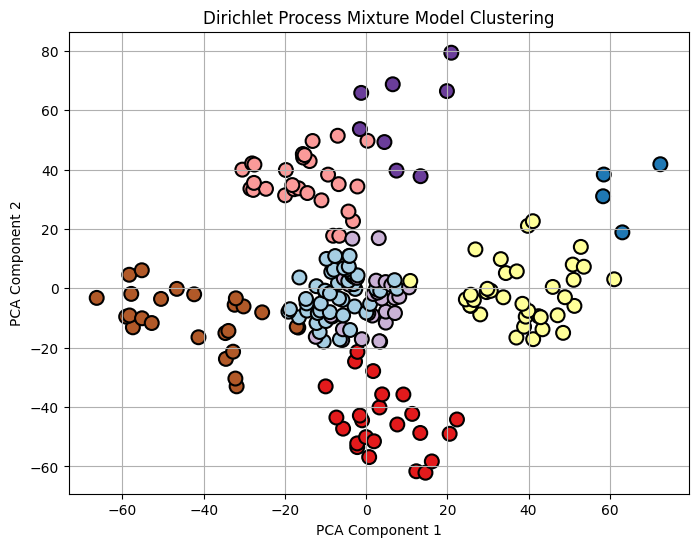

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k', s=100, linewidth=1.5)
plt.title('Dirichlet Process Mixture Model Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

## The End ! 